<a href="https://colab.research.google.com/github/djbrady/computationalImaging/blob/master/homework10problem8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 270 Fields and Waves
# Fall 2020
# quantum mechanics
# solution to homework 10 problem 8
## David Brady

## Initialization

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
from scipy.optimize import fsolve




# Transmittance of a square barrier
According to Tamvakis Eqn. (3.62), the probability of tunneling through a barrier of height $V_o$ extending from $-L$ to $L$ is  
$$ \tau =\left \lbrack  1+ {\sinh^2 \left ( 2\beta \sqrt{1- {E\over V_o}}\right )\over 4 \left (1 -{E\over V_o}\right ){E\over V_o}}\right \rbrack^{-1} $$
where 
$$
\beta = \sqrt{{2m V_oL^2\over \hbar^2}}$$


$m=9.1\times 10^{-31}$ Kg, $V= 2 $ keV. We know
$\hbar = 1.05\times 10^{-34}$ m$^2$kg/s. $\frac{E}{V}=0.5$

In [2]:
m=9.1*np.power(10.,-31); #kg
V= 2*1.6*np.power(10.,-16); # joules
hbar= 1.05*np.power(10.,-34);
beta=np.sqrt(2.*m*V/(hbar*hbar));
E=0.5;
def tau(L): # E in electron volts, L in pm
  t=np.power(np.sinh(2.*beta*L*np.power(10.,-12)*np.sqrt(1-E)),2)/(4.*E*(1-E));
  t=1./(1.+t);
  return t


(0.0, 1.0)

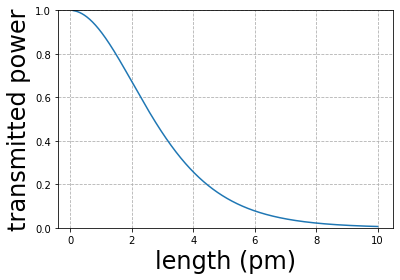

In [3]:
L=np.linspace(.1,10,1000);
fig = plt.figure()
plt.plot(L,tau(L));
plt.xlabel('length (pm)',fontsize=24)
plt.ylabel('transmitted power',fontsize=24)
plt.grid(linestyle='--')
plt.ylim(0, 1)

In [7]:
func = lambda L : .1 - tau(L)
tau_initial_guess = 6
tau_solution = fsolve(func, tau_initial_guess)
print("transmittance probability is 10 percent when L=%2.2f picometers, corresponding to a total barrier thickness of  2L=%2.2f picometers " %(tau_solution, 2*tau_solution) )

transmittance probability is 10 percent when L=5.59 picometers, corresponding to a total barrier thickness of  2L=11.19 picometers 


In [8]:
func = lambda L : .01 - tau(L)
tau_initial_guess = 6
tau_solution = fsolve(func, tau_initial_guess)
print("transmittance probability is 1 percent when L=%2.2f picometers, corresponding to a total barrier thickness of  2L=%2.2f picometers " %(tau_solution, 2*tau_solution) )

transmittance probability is 1 percent when L=9.21 picometers, corresponding to a total barrier thickness of  2L=18.42 picometers 
